In [234]:
import sys
print("Python executable:", sys.executable)

import notebook
print("Jupyter version:", notebook.__version__)

Python executable: c:\Users\hp\anaconda3\python.exe
Jupyter version: 7.2.2


%pip install pandas numpy matplotlib seaborn scikit-learn

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn

In [235]:
import pandas as pd

#loading the data set 
heart_data = pd.read_csv('cardio.csv', sep=';') # uses ';' instead of ','

# deleting id column
heart_data = heart_data.drop(columns=['id'])

heart_data.head() #displays the first few rows


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,17623,2,169,82.0,150,100,1,1,0,0,1,1
3,17474,1,156,56.0,100,60,1,1,0,0,0,0
4,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [236]:
heart_data.tail() #displays the last few rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69992,19240,2,168,76.0,120,80,1,1,1,0,1,0
69993,22601,1,158,126.0,140,90,2,2,0,0,1,1
69994,19066,2,183,105.0,180,90,3,1,0,1,0,1
69995,22431,1,163,72.0,135,80,1,2,0,0,0,1
69996,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [237]:
# Basic info (gives data types and basic info)
heart_data.info()

# Check for missing values
heart_data.isnull().sum()

# Describe statistics (mean, std, min, etc.)
heart_data.describe()

# Remove duplicates
heart_data = heart_data.drop_duplicates()

# Check for missing values
print(heart_data.isnull().sum())

# Drop rows with missing values 
heart_data = heart_data.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69997 non-null  int64  
 1   gender       69997 non-null  int64  
 2   height       69997 non-null  int64  
 3   weight       69997 non-null  float64
 4   ap_hi        69997 non-null  int64  
 5   ap_lo        69997 non-null  int64  
 6   cholesterol  69997 non-null  int64  
 7   gluc         69997 non-null  int64  
 8   smoke        69997 non-null  int64  
 9   alco         69997 non-null  int64  
 10  active       69997 non-null  int64  
 11  cardio       69997 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [238]:
# For age:
# Age is in days – convert to years
heart_data['age'] = (heart_data['age'] / 365).astype(int)

In [239]:
# For gender:
# Usually 1 or 2, check if any invalid
print(heart_data['gender'].value_counts())

gender
1    45508
2    24465
Name: count, dtype: int64


In [240]:
# For height and weight:
# Remove extreme height/weight values
heart_data = heart_data[(heart_data['height'] > 100) & (heart_data['height'] < 250)]
heart_data = heart_data[(heart_data['weight'] > 30) & (heart_data['weight'] < 200)]

In [241]:
# For systolic and diastolic blood pressure:
# Remove invalid blood pressure values
heart_data = heart_data[(heart_data['ap_hi'] > 80) & (heart_data['ap_hi'] < 250)]
heart_data = heart_data[(heart_data['ap_lo'] > 50) & (heart_data['ap_lo'] < 200)]

In [242]:
# Also check that ap_hi is higher than ap_lo
heart_data = heart_data[heart_data['ap_hi'] > heart_data['ap_lo']]

In [243]:
#For cholestrol and glucose:
# Should be 1 (normal), 2 (above normal), 3 (well above normal)
print(heart_data['cholesterol'].value_counts())
print(heart_data['gluc'].value_counts())

cholesterol
1    51345
2     9275
3     7856
Name: count, dtype: int64
gluc
1    58213
3     5210
2     5053
Name: count, dtype: int64


In [244]:

# For smoke, alco, active, cardio:
# Should be 0 or 1. Check for strange values
for col in ['smoke', 'alco', 'active', 'cardio']:
    print(f"{col}:", heart_data[col].value_counts())
       
# Optionally ensure binary
for col in ['smoke', 'alco', 'active', 'cardio']:
    heart_data = heart_data[heart_data[col].isin([0, 1])]

smoke: smoke
0    62455
1     6021
Name: count, dtype: int64
alco: alco
0    64821
1     3655
Name: count, dtype: int64
active: active
1    55014
0    13462
Name: count, dtype: int64
cardio: cardio
0    34563
1    33913
Name: count, dtype: int64


In [245]:
heart_data['cardio'].value_counts(normalize=True) * 100


cardio
0    50.474619
1    49.525381
Name: proportion, dtype: float64

In [246]:
heart_data.to_csv('cleaned_data.csv', index=False)

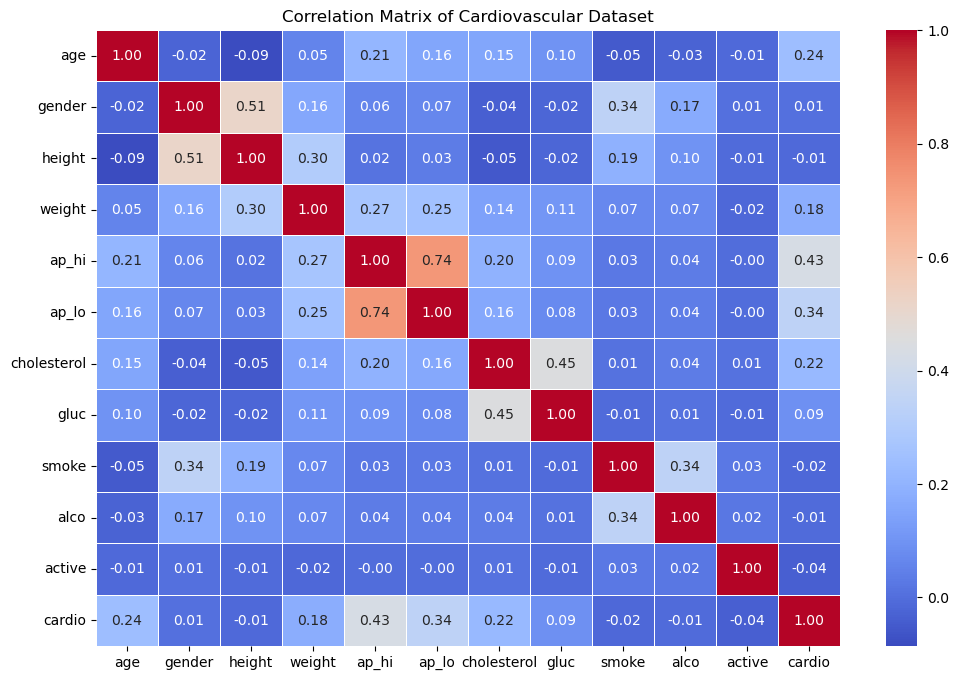

cardio         1.000000
ap_hi          0.427855
ap_lo          0.341164
age            0.238937
cholesterol    0.221203
weight         0.179244
gluc           0.089323
gender         0.006827
alco          -0.008466
height        -0.013028
smoke         -0.015979
active        -0.038063
Name: cardio, dtype: float64


In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creation of correation matrix:
correlation_matrix = heart_data.corr(numeric_only=True)

# annot=True: shows the actual correlation values in the cells
# cmap='coolwarm': color scheme for easy interpretation
# fmt=".2f": rounds values to 2 decimal places
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Cardiovascular Dataset')
plt.show()

#To view how all features correlate with cardio (your target):
correlation_with_target = correlation_matrix['cardio'].sort_values(ascending=False)
print(correlation_with_target)


In [248]:
print(heart_data['ap_hi'].describe())
print(heart_data['ap_lo'].describe())

count    68476.000000
mean       126.739047
std         16.628021
min         85.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: ap_hi, dtype: float64
count    68476.000000
mean        81.361864
std          9.379498
min         52.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        182.000000
Name: ap_lo, dtype: float64


In [249]:
heart_data['age'].head()

0    50
1    51
2    48
3    47
4    60
Name: age, dtype: int32

In [250]:
#Feature Engineering

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copy the dataset
df = heart_data.copy()

# --- Create BMI if it doesn't exist ---
if 'BMI' not in df.columns:
    df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# --- Create Overweight if it doesn't exist ---
if 'Overweight' not in df.columns:
    df['Overweight'] = np.where(df['BMI'] >= 25, 1, 0)

# --- Create blood pressure category ---
def bp_category(systolic):
    if systolic < 120:
        return 'Normal'
    elif systolic < 140:
        return 'Elevated'
    elif systolic < 160:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

df['bp_category'] = df['ap_hi'].apply(bp_category)

# --- One-hot encode categorical variables ---
categorical_cols = ['gender', 'bp_category', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Overweight']
categorical_cols = [col for col in categorical_cols if col in df.columns]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- Define X and y ---
X = df_encoded.drop(columns=['cardio'])
y = df_encoded['cardio']

# --- Scale numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Feature Engineering Completed Successfully!")



Feature Engineering Completed Successfully!


In [251]:
#MODEL DEVELOPMENT

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate with cross-validation
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf,
    
}

print("Training models and calculating cross-validation scores...\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Average CV Score = {cv_scores.mean():.4f}")


Training models and calculating cross-validation scores...

Logistic Regression: Average CV Score = 0.7296
Decision Tree: Average CV Score = 0.6357
Random Forest: Average CV Score = 0.7092



Evaluating models...

--- Logistic Regression ---
Accuracy: 0.7303
Precision: 0.7739
Recall: 0.6434
F1 Score: 0.7026
ROC-AUC: 0.7914



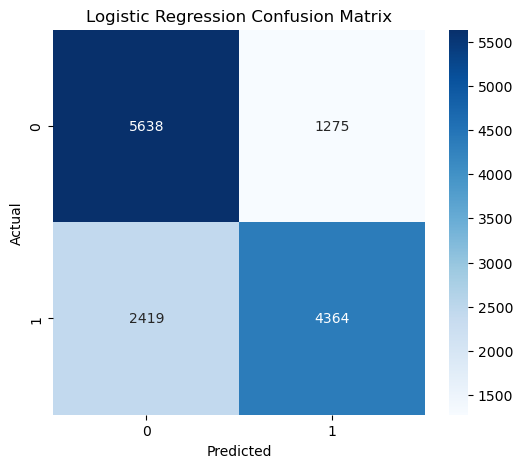

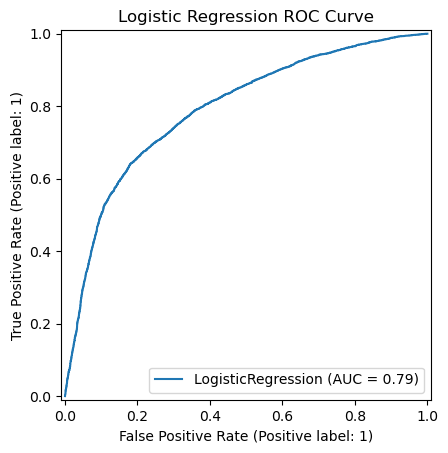

--- Decision Tree ---
Accuracy: 0.6392
Precision: 0.6397
Recall: 0.6218
F1 Score: 0.6306
ROC-AUC: 0.6401



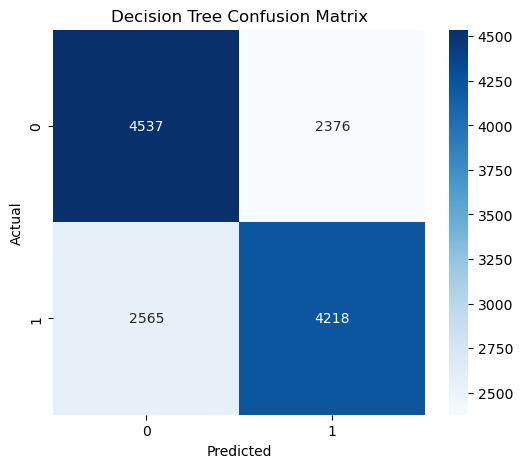

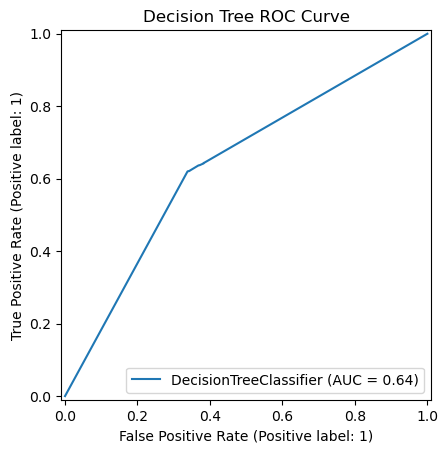

--- Random Forest ---
Accuracy: 0.7064
Precision: 0.7064
Recall: 0.6969
F1 Score: 0.7016
ROC-AUC: 0.7644



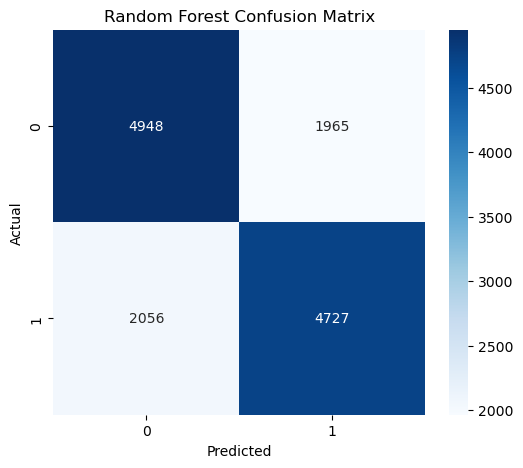

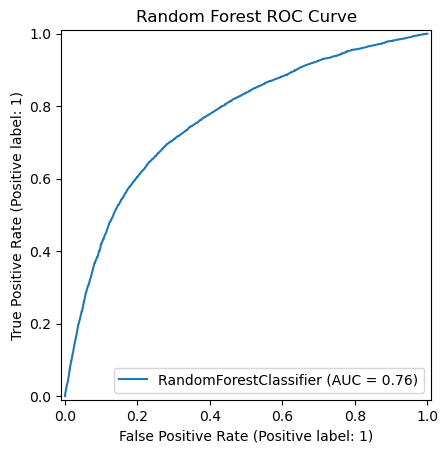

In [252]:
#MODEL EVALUATION

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

print("\nEvaluating models...\n")
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'{name} ROC Curve')
    plt.show()
